# Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy create_engine to connect to your sqlite database.

* Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [1]:
# import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# display multiple print results on one line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# expands .describe with more info about the data set
import pandas_profiling

# sqlalchemy dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float, Text

# PyMySQL 
import pymysql
pymysql.install_as_MySQLdb()

# flask 
from flask import Flask, jsonify

height has been deprecated.



In [ ]:
# choose start date and end date for my trip
# Friday 2018-08-17 - Thu 2018-08-22

In [2]:
# Use SQLAlchemy create_engine to connect to my sqlite database

engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
conn = engine.connect()

In [3]:
# Use SQLAlchemy automap_base() to refelct tables into classes and save a reference to those classes
# called Station and Measurement
Base = automap_base()

In [4]:
# use the base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [58]:
# print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# assign measurement and station classes to variables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# create a session
# a session means that you want to do something to your data
session = Session(engine)

In [8]:
# Display the row's columns and data in dict format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x118051908>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

In [9]:
# Display the row's columns and data in dict format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1180602b0>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

# Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the date and prcp values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame plot method.



In [10]:
# Design a query to retrieve the last 12 months of precipitation data
# precipitation data is found in Measurement
# select only the date and prcp values
# last 12 months: 2017-08-23 - 2016-08-23

for row in session.query(Measurement.date, Measurement.prcp, Measurement.station, Station.name).filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').limit(10):
    print (row)                                                                       

('2016-08-23', 0.0, 'USC00519397', 'WAIKIKI 717.2, HI US')
('2016-08-23', 0.0, 'USC00519397', 'KANEOHE 838.1, HI US')
('2016-08-23', 0.0, 'USC00519397', 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
('2016-08-23', 0.0, 'USC00519397', 'PEARL CITY, HI US')
('2016-08-23', 0.0, 'USC00519397', 'UPPER WAHIAWA 874.3, HI US')
('2016-08-23', 0.0, 'USC00519397', 'WAIMANALO EXPERIMENTAL FARM, HI US')
('2016-08-23', 0.0, 'USC00519397', 'WAIHEE 837.5, HI US')
('2016-08-23', 0.0, 'USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US')
('2016-08-23', 0.0, 'USC00519397', 'MANOA LYON ARBO 785.2, HI US')
('2016-08-24', 0.08, 'USC00519397', 'WAIKIKI 717.2, HI US')


In [11]:
# store results into variable to load into a pandas dataframe

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').\
order_by(Measurement.date.desc()).all()
# results

In [12]:
# unpack date and prcp to plot in matplotlib using list comprehension [:] selects everything in the list
date = [result[0] for result in results[:]]
prcp = [result[1] for result in results[:]]
# station = [result[2] for result in results[:]]
# name = [result[3] for result in results[:]]

In [59]:
# load results into pandas df
results_df = pd.DataFrame(results[:], columns =['date', 'prcp'])
# results_df.set_index('date', inplace=True)
results_df.shape

# I changed the index to 'date', but could not convert date to a datetime for plotting

(2021, 2)

In [14]:
# results_df.to_csv('results_check_dups2.csv', index=False)

In [15]:
# checks data types for results_df
results_df.dtypes

date     object
prcp    float64
dtype: object

In [16]:
# convert 'date' to datetime
results_df['date'] = pd.to_datetime(results_df.date)

In [17]:
# check data types for results_df again to make sure date changed to datetime
results_df.dtypes

date    datetime64[ns]
prcp           float64
dtype: object

# Plot with matplotlib

In [18]:
import datetime
import matplotlib.dates as mdates

In [19]:
# results_df.to_csv('results_df2.csv', index=False)

In [20]:
# re-import the saved csv
# syntax will set index to date which will place date on x axis
results_plot_df = pd.read_csv('results_df2.csv', usecols=['date','prcp'], parse_dates=['date'])
results_plot_df.set_index('date', inplace=True)
results_plot_df.head()
results_plot_df.shape

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


(2021, 1)

In [21]:
# check data type
results_plot_df.dtypes

prcp    float64
dtype: object

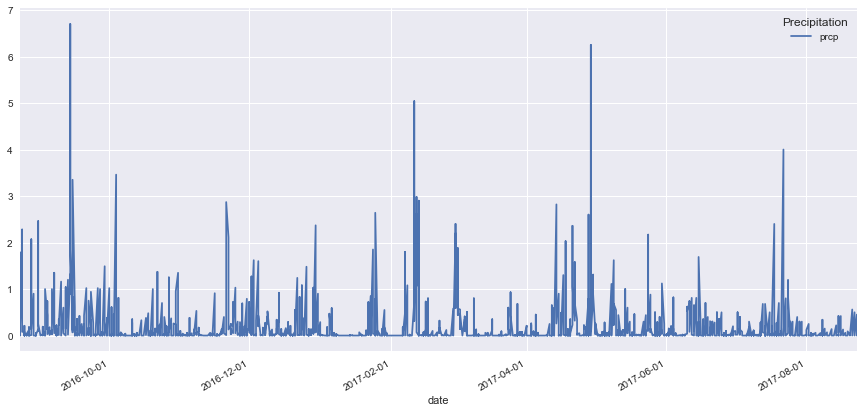

In [22]:
# plot data
sns.set()
fig, ax = plt.subplots(figsize=(15,7))
results_plot_df.plot(ax=ax)
plt.legend(title="Precipitation", fancybox=True)

# set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

In [23]:
# use pandas to print the summary statistics for the precipitation data
results_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
results_df.sort_values('prcp', ascending=False).head()

,date,prcp
1899,2016-09-14,6.70
604,2017-04-29,6.25
1031,2017-02-11,5.04
138,2017-07-22,4.00
1776,2016-10-04,3.46


In [25]:
# use pandas profiling to analyze merge1_drop
results_df_profile = pandas_profiling.ProfileReport(results_df)
results_df_profile

Number of variables,2
Number of observations,2021
Total Missing (%),0.0%
Total size in memory,31.7 KiB
Average record size in memory,16.0 B
Numeric,1
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


# Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

    * List the stations and observation counts in descending order
    * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

    * Filter by the station with the highest number of observations.
    * Plot the results as a histogram with bins=12.


In [26]:
# query to calculate total number of stations
print("The total number of stations:", session.query(Station.station).count())

The total number of stations: 9


In [27]:
# most active stations in descending order
print('The Station with the highest number of observtations is USC00519281.')
session.query(Measurement.station, func.count(Measurement.station).label("most_active_stations"))\
    .group_by(Measurement.station).order_by("most_active_stations DESC").all()   

The Station with the highest number of observtations is USC00519281.


[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [28]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).

for row in session.query(Measurement.date, Measurement.tobs, Measurement.station, Station.name).filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').limit(10):
    print (row)       

('2016-08-23', 81.0, 'USC00519397', 'WAIKIKI 717.2, HI US')
('2016-08-23', 81.0, 'USC00519397', 'KANEOHE 838.1, HI US')
('2016-08-23', 81.0, 'USC00519397', 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
('2016-08-23', 81.0, 'USC00519397', 'PEARL CITY, HI US')
('2016-08-23', 81.0, 'USC00519397', 'UPPER WAHIAWA 874.3, HI US')
('2016-08-23', 81.0, 'USC00519397', 'WAIMANALO EXPERIMENTAL FARM, HI US')
('2016-08-23', 81.0, 'USC00519397', 'WAIHEE 837.5, HI US')
('2016-08-23', 81.0, 'USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US')
('2016-08-23', 81.0, 'USC00519397', 'MANOA LYON ARBO 785.2, HI US')
('2016-08-24', 79.0, 'USC00519397', 'WAIKIKI 717.2, HI US')


In [29]:
tobs_results = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').\
order_by(Measurement.date.desc()).all()
# tobs_results

In [30]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs)
# Filter by the station with the highest number of observations.
# Plot the results as a histogram with bins=12.

tobs_results= session.query(Measurement.station, Measurement.tobs, func.count(Measurement.tobs).\
    label("highest_observations")).\
    group_by(Measurement.tobs).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23').\
    order_by("highest_observations DESC").all() 
tobs_results

[('USC00516128', 77.0, 193),
 ('USC00516128', 76.0, 186),
 ('USC00516128', 78.0, 179),
 ('USC00516128', 74.0, 160),
 ('USC00516128', 75.0, 159),
 ('USC00516128', 79.0, 138),
 ('USC00516128', 80.0, 132),
 ('USC00516128', 72.0, 114),
 ('USC00516128', 71.0, 113),
 ('USC00516128', 73.0, 110),
 ('USC00516128', 70.0, 102),
 ('USC00516128', 69.0, 85),
 ('USC00519281', 81.0, 78),
 ('USC00516128', 68.0, 49),
 ('USC00516128', 67.0, 47),
 ('USC00516128', 82.0, 38),
 ('USC00516128', 66.0, 28),
 ('USC00516128', 65.0, 26),
 ('USC00516128', 64.0, 23),
 ('USC00519281', 63.0, 15),
 ('USC00519281', 62.0, 13),
 ('USC00519281', 83.0, 12),
 ('USC00516128', 60.0, 6),
 ('USC00519523', 84.0, 6),
 ('USC00519281', 61.0, 4),
 ('USC00519281', 59.0, 3),
 ('USC00516128', 58.0, 1),
 ('USC00519397', 87.0, 1)]

* un pack and add to df

In [31]:
# unpack date and prcp to plot in matplotlib using list comprehension [:] selects everything in the list
station_tobs = [t[0] for t in tobs_results[:]]
tobs_2 = [t[1] for t in tobs_results[:]]
observations = [t[2] for t in tobs_results[:]]

In [32]:
# load results into pandas df
tobs_df = pd.DataFrame(tobs_results[:], columns =['station', 'tobs', 'observations'])
tobs_df
tobs_df.shape

,station,tobs,observations
0,USC00516128,77.0,193
1,USC00516128,76.0,186
2,USC00516128,78.0,179
3,USC00516128,74.0,160
4,USC00516128,75.0,159
5,USC00516128,79.0,138
6,USC00516128,80.0,132
7,USC00516128,72.0,114
8,USC00516128,71.0,113
9,USC00516128,73.0,110


(28, 3)

In [33]:
plot_tobs = tobs_df[['tobs']]
plot_tobs.sort_values('tobs', ascending=False)

,tobs
27,87.0
23,84.0
21,83.0
15,82.0
12,81.0
6,80.0
5,79.0
2,78.0
0,77.0
1,76.0


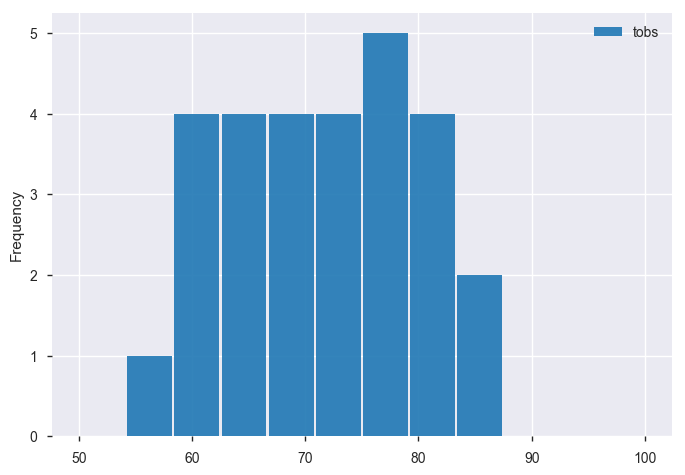

In [34]:
# n_bins = 12
plt.figure()
plot_tobs.plot.hist(alpha=0.9, range=[50, 100], bins=12, rwidth=0.95)

** syntax below .filter is similar to join on sql

* Calculate the Item Totals (sum(UnitPrice * Quantity)) for the USA

session.query(func.sum(Items.UnitPrice * Items.Quantity)).\
    filter(Invoices.InvoiceId == Items.InvoiceId).\
    filter(Invoices.BillingCountry == 'USA').scalar()


In [ ]:
# np.ravel unpacks json format to list
# countries_list = list(np.ravel(results))


In [35]:
new_book = pd.read_csv('new_book.csv')
new_book.head()
new_book.shape

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00519397,8/23/17,0.00,81,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00514830,8/23/17,0.00,82,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
2,USC00519523,8/23/17,0.08,82,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
3,USC00516128,8/23/17,0.45,76,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
4,USC00519397,8/22/17,0.00,82,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0


(2021, 8)

In [36]:
new_book['station'].value_counts()

USC00519397    359
USC00519281    352
USC00513117    343
USC00516128    328
USC00519523    314
USC00514830    265
USC00517948     60
Name: station, dtype: int64

# Temperature Analysis

* Write a function called **calc_temps** that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

* Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

***Use the average temperature as the bar height.***
***Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).***

In [37]:
# calc_temps func
# my travel dates = Friday 2018-08-17 - Thu 2018-08-22
# func.min
# func.max
# func.avg
# session.query(self.stats.c.ID, func.max(self.stats.c.STA_DATE))

calc_temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.tobs.desc()).all()

calc_temps

# calc_temps_list = list(np.ravel(calc_temps))
# np.mean(calc_temps_list)

[('2017-08-17', 83.0),
 ('2017-08-22', 82.0),
 ('2017-08-22', 82.0),
 ('2017-08-20', 81.0),
 ('2017-08-21', 81.0),
 ('2017-08-18', 80.0),
 ('2017-08-19', 80.0),
 ('2017-08-20', 80.0),
 ('2017-08-19', 79.0),
 ('2017-08-21', 79.0),
 ('2017-08-18', 79.0),
 ('2017-08-17', 78.0),
 ('2017-08-18', 77.0),
 ('2017-08-17', 76.0),
 ('2017-08-21', 76.0),
 ('2017-08-22', 76.0),
 ('2017-08-17', 72.0),
 ('2017-08-19', 71.0)]

In [38]:
# using query to find list of temps, then find the mean of that list
weather_vacation = session.query(Measurement.tobs).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.tobs.desc()).all()

weather_vacation

weather_vacation_list = list(np.ravel(weather_vacation))
np.mean(weather_vacation_list)

[(83.0),
 (82.0),
 (82.0),
 (81.0),
 (81.0),
 (80.0),
 (80.0),
 (80.0),
 (79.0),
 (79.0),
 (79.0),
 (78.0),
 (77.0),
 (76.0),
 (76.0),
 (76.0),
 (72.0),
 (71.0)]

78.444444444444443

In [39]:
# max
max_temps = session.query(func.max(Measurement.tobs)).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.date.desc()).all()

max_temps

# this will change from tuple to list
max_temps_list = list(np.ravel(max_temps))
max_temps_list

[(83.0)]

[83.0]

In [40]:
# min
min_temps = session.query(func.min(Measurement.tobs)).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.date.desc()).all()

min_temps

# this will change from tuple to list
min_temps_list = list(np.ravel(min_temps))
min_temps_list

[(71.0)]

[71.0]

In [41]:
# avg
avg_temps = session.query(func.avg(Measurement.tobs)).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.date.desc()).all()

avg_temps

# this will change from tuple to list
avg_temps_list = list(np.ravel(avg_temps))
avg_temps_list

[(78.44444444444444)]

[78.444444444444443]

In [42]:
# plot
# ***Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).***
maxtemps = max_temps_list[0]
mintemps = min_temps_list[0]
avgtemps = avg_temps_list[0]

maxtemps
mintemps
avgtemps.round()

errorbar = maxtemps - mintemps
errorbar

83.0

71.0

78.0

12.0

In [55]:
weather_data = {'maxtemps': [maxtemps],
               'mintemps': [mintemps],
               'avgtemps': [avgtemps.round()],
               'errorbar': [errorbar]}
weather_df = pd.DataFrame(weather_data, columns = ['maxtemps', 'mintemps', 'avgtemps', 'errorbar'])
weather_df

,maxtemps,mintemps,avgtemps,errorbar
0,83.0,71.0,78.0,12.0


In [53]:
yerr = errorbar

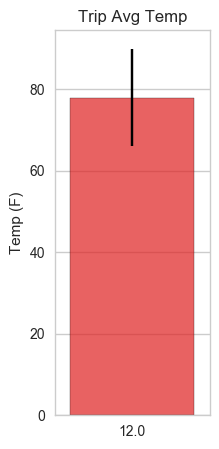

In [57]:
sns.set_style("whitegrid")
plt.figure(figsize=(2,5))
ax = sns.barplot(x= "errorbar", y= "avgtemps", color="r", ci=95, edgecolor = 'black', yerr = 12, capsize=7,
                 alpha=0.7, data=weather_df)
# plt.errorbar(x, y, yerr)
ax.set_ylabel("Temp (F)")
ax.set_xlabel('')
plt.title("Trip Avg Temp")

# Optional Recommended Analysis
The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.

* Calcualte the rainfall per weather station using the previous year's matching dates.

* Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

* Create a function called daily_normals that will calculate the daily normals for a specific date. This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.

* Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.

* Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
* Use Pandas to plot an area plot (stacked=False) for the daily normals.

In [69]:
# rain fall per weather station

rainfall = session.query(Measurement.station, Measurement.prcp, func.count(Measurement.station).\
              label("rainfall_per_station")).\
              group_by(Measurement.station).\
              filter(Measurement.date <= '2017-08-22').\
              filter(Measurement.date >= '2017-08-17').\
              order_by('rainfall_per_station DESC').all()
rainfall
                # this will change from tuple to list
# rainfall_list = list(np.ravel(rainfall))
# rainfall_list                

[('USC00514830', 0.02, 5),
 ('USC00519397', 0.0, 5),
 ('USC00516128', 0.5, 4),
 ('USC00519281', 0.06, 2),
 ('USC00519523', 0.0, 2)]

# Daily Normals
* max rain
* min rain
* avg rain


In [ ]:
# Create a function called daily_normals that will calculate the daily normals for a specific date. 
# This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date

In [70]:
# max rain
max_rain = session.query(func.max(Measurement.prcp)).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.date.desc()).all()

max_rain

# this will change from tuple to list
max_rain_list = list(np.ravel(max_rain))
max_rain_list

[(0.56)]

[0.56000000000000005]

In [71]:
# min rain
min_rain = session.query(func.min(Measurement.prcp)).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.date.desc()).all()

min_rain

# this will change from tuple to list
min_rain_list = list(np.ravel(min_rain))
min_rain_list

[(0.0)]

[0.0]

In [87]:
# avg rain
avg_rain = session.query(func.avg(Measurement.prcp)).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.date.desc()).all()

avg_rain

# this will change from tuple to list
avg_rain_list = list(np.ravel(avg_rain))
avg_rain_list

[(0.07944444444444446)]

[0.079444444444444456]

In [75]:
# dates
# Friday 2018-08-17 - Thu 2018-08-22

trip_dates = session.query(Measurement.date).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.date.desc()).all()

# trip_dates

# change from tuple to list
trip_dates_list = list(np.ravel(trip_dates))
trip_dates_list

['2017-08-22',
 '2017-08-22',
 '2017-08-22',
 '2017-08-21',
 '2017-08-21',
 '2017-08-21',
 '2017-08-20',
 '2017-08-20',
 '2017-08-19',
 '2017-08-19',
 '2017-08-19',
 '2017-08-18',
 '2017-08-18',
 '2017-08-18',
 '2017-08-17',
 '2017-08-17',
 '2017-08-17',
 '2017-08-17']

In [115]:
# slice values out of list to use for pandas df
maxrain = max_rain_list[0].round(2)
minrain = min_rain_list[0]
avgrain = avg_rain_list[0].round(2)

# need to make sure this doesn't end up as a list
trip_dates = trip_dates_list[:]

In [119]:
# create a data frame of prcp, dates 

rainfall_df = {'maxrain': [maxrain],
               'minrain': [minrain],
               'avgrain': [avgrain],
               'date': [trip_dates]}
rainfall_df = pd.DataFrame(rainfall_df, columns = ['maxrain', 'minrain', 'avgrain', 'date'])
rainfall_df.set_index('date', inplace=True)
rainfall_df

,maxrain,minrain,avgrain
date,,,
"[2017-08-22, 2017-08-22, 2017-08-22, 2017-08-21, 2017-08-21, 2017-08-21, 2017-08-20, 2017-08-20, 2017-08-19, 2017-08-19, 2017-08-19, 2017-08-18, 2017-08-18, 2017-08-18, 2017-08-17, 2017-08-17, 2017-08-17, 2017-08-17]",0.56,0.0,0.08


# Step 4 - Climate App


***code will only run using a .py file from terminal***
***see climate_app.py for final code***

In [61]:
# checks to see if engine is set up
engine

Engine(sqlite:///hawaii.sqlite)

In [62]:
# flask setup
app = Flask(__name__)

In [ ]:
# flask routes
@app.route("/")
def main():
    """List all available api routes"""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation - Precipitation<br/>"
        f"/api/v1.0/stations - Stations<br/>"
        f"/api/v1.0/tobs - Temperature Observation<br/>"
        f"/api/v1.0/temperature - Temperature Start<br/>"
        
        
        
        f"/api/v1.0/<start>/<end>")

In [ ]:
# prcp route

@app.route("/api/v1.0/precipitation")
def precipitation_test1():
    """Return a list of dates and tobs"""
    # Query for the dates and prcp from last year
    results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date.desc()).all()
    
    # Convert list of tuples into normal list
    prcp_list = list(np.ravel(results))
    
    return jsonify(prcp_list)

In [ ]:
# stations route

@app.route("/api/v1.0/stations")
def stations_test1():
    """Return a json list of stations from the dataset"""
    # Query stations
    station_results = session.query(Measurement.station, func.count(Measurement.station).label("most_active_stations"))\
    .group_by(Measurement.station).order_by("most_active_stations DESC").all()
    
    station_results_list = list(np.ravel(station_results))
    
    return jsonify(station_results_list)

In [ ]:
# tobs route

@app.route("/api/v1.0/tobs")
def tobs_test1():
    """Return a json list of tobs for the previous year"""
    # Query tobs
    tobs_results = session.query(Measurement.station, Measurement.tobs, func.count(Measurement.tobs).\
    label("highest_observations")).\
    group_by(Measurement.tobs).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23').\
    order_by("highest_observations DESC").all() 
    
    tobs_results_list = list(np.ravel(tobs_results))
    
    return jsonify(tobs_results_list)    

In [65]:
# min, avg, max tobs route
# max temp for given start-end range

@app.route("/api/v1.0/temperature")
def temps_test2():
    """Return a json list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range."""
    # Query  temps
    temps_results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date <= '2017-08-22').\
    filter(Measurement.date >= '2017-08-17').\
    order_by(Measurement.tobs.desc()).all()
    
    temps_results_list = list(np.ravel(temps_results))
    
    return jsonify(temps_results_list)

In [66]:
# start range - min
# when given the start only, calculate TMIN, TAVG & TMAX
# for all dates >= to the start date

@app.route("/api/v1.0/start")
@app.route("/api/v1.0/start/tmin")
def temps_start_test1():
    """Returns tmin"""
    min_temps_results = session.query(func.min(Measurement.tobs)).filter(Measurement.date <= '2017-08-22').\
    filter(Measurement.date >= '2017-08-17').\
    order_by(Measurement.date.desc()).all()
    
    min_temps_results_list = list(np.ravel(min_temps_results))
    
    return jsonify(min_temps_results_list)

In [67]:
# start range - avg

@app.route("/api/v1.0/start")
@app.route("/api/v1.0/start/tavg")
def temps_start_tavg1():
    """returns tavg"""
    avg_temps_results = session.query(func.avg(Measurement.tobs)).filter(Measurement.date <= '2017-08-22').\
    filter(Measurement.date >= '2017-08-17').\
    order_by(Measurement.date.desc()).all()
    
    avg_temps_results_list = list(np.ravel(avg_temps_results))
    
    return jsonify(avg_temps_results_list)

In [68]:
# start range - max

@app.route("/api/v1.0/start")
@app.route("/api/v1.0/start/tmax")
def temps_start_tmax1():
    """returns tmax"""
    max_temps_results = session.query(func.max(Measurement.tobs)).filter(Measurement.date <= '2017-08-22').\
    filter(Measurement.date >= '2017-08-17').\
    order_by(Measurement.date.desc()).all()
    
    max_temps_results_list = list(np.ravel(max_temps_results))
    
    return jsonify(max_temps_results_list)

*** this ends the section of tmin, tmax, tavg

***add code below to .py file

In [ ]:
# start / end
# when given the start and end date, calculate TMIN, TAVG & TMAX
# for dates between the start and end date inclusive

In [ ]:
# code to run app
# if __name__ == '__main__':
    # app.run()

*** run above from a .py file in terminal***